In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
sns.set(style = "whitegrid", 
        color_codes = True,
        font_scale = 1.5)

### 导入数据

In [2]:
df1 = pd.read_excel('附件.xlsx',sheet_name='表单1')
df1.head()

,文物编号,纹饰,类型,颜色,表面风化
0,1,C,高钾,蓝绿,无风化
1,2,A,铅钡,浅蓝,风化
2,3,A,高钾,蓝绿,无风化
3,4,A,高钾,蓝绿,无风化
4,5,A,高钾,蓝绿,无风化


In [3]:
df2 = pd.read_excel('附件.xlsx',sheet_name='表单2')
df2.head()

,文物采样点,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,01,69.33,NaN,9.99,6.32,0.87,3.93,1.74,3.87,NaN,NaN,1.17,NaN,NaN,0.39
1,02,36.28,NaN,1.05,2.34,1.18,5.73,1.86,0.26,47.43,NaN,3.57,0.19,NaN,NaN
2,03部位1,87.05,NaN,5.19,2.01,NaN,4.06,NaN,0.78,0.25,NaN,0.66,NaN,NaN,NaN
3,03部位2,61.71,NaN,12.37,5.87,1.11,5.50,2.16,5.09,1.41,2.86,0.70,0.10,NaN,NaN
4,04,65.88,NaN,9.67,7.12,1.56,6.44,2.06,2.18,NaN,NaN,0.79,NaN,NaN,0.36


In [4]:
df3 = pd.read_excel('附件.xlsx',sheet_name='表单3')
df3.head()

,文物编号,表面风化,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,A1,无风化,78.45,NaN,NaN,6.08,1.86,7.23,2.15,2.11,NaN,NaN,1.06,0.03,NaN,0.51
1,A2,风化,37.75,NaN,NaN,7.63,NaN,2.33,NaN,NaN,34.30,NaN,14.27,NaN,NaN,NaN
2,A3,无风化,31.95,NaN,1.36,7.19,0.81,2.93,7.06,0.21,39.58,4.69,2.68,0.52,NaN,NaN
3,A4,无风化,35.47,NaN,0.79,2.89,1.05,7.07,6.45,0.96,24.28,8.31,8.45,0.28,NaN,NaN
4,A5,风化,64.29,1.2,0.37,1.64,2.34,12.75,0.81,0.94,12.23,2.16,0.19,0.21,0.49,NaN


In [5]:
df4 = pd.read_excel('附件.xlsx',sheet_name='表单4')
df4 = df4.drop(['文物编号','纹饰','颜色','文物采样点'],axis=1)
df4.head()

,表面风化,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),类型
0,无风化,69.33,NaN,9.99,6.32,0.87,3.93,1.74,3.87,NaN,NaN,1.17,NaN,NaN,0.39,高钾
1,无风化,87.05,NaN,5.19,2.01,NaN,4.06,NaN,0.78,0.25,NaN,0.66,NaN,NaN,NaN,高钾
2,无风化,61.71,NaN,12.37,5.87,1.11,5.50,2.16,5.09,1.41,2.86,0.70,0.10,NaN,NaN,高钾
3,无风化,65.88,NaN,9.67,7.12,1.56,6.44,2.06,2.18,NaN,NaN,0.79,NaN,NaN,0.36,高钾
4,无风化,61.58,NaN,10.95,7.35,1.77,7.50,2.62,3.27,NaN,NaN,0.94,0.06,NaN,0.47,高钾


In [6]:
df4.shape

(66, 16)

### 划分训练、验证集

In [7]:
from sklearn.model_selection import train_test_split

train, val = train_test_split(df4, test_size=0.1, random_state=42)

In [8]:
train.head()

,表面风化,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),类型
12,风化,92.63,NaN,NaN,1.07,NaN,1.98,0.17,3.24,NaN,NaN,0.61,NaN,NaN,NaN,高钾
65,风化,30.39,NaN,0.34,3.49,0.79,3.52,0.86,3.13,39.35,7.66,8.99,0.24,NaN,NaN,铅钡
30,无风化,49.01,2.71,NaN,1.13,NaN,1.45,NaN,0.86,32.92,7.95,0.35,NaN,NaN,NaN,铅钡
33,风化,33.59,NaN,0.21,3.51,0.71,2.69,NaN,4.93,25.39,14.61,9.38,0.37,NaN,NaN,铅钡
9,无风化,65.18,2.10,14.52,8.27,0.52,6.18,0.42,1.07,0.11,0.00,NaN,0.04,NaN,NaN,高钾


In [9]:
val.head()

,表面风化,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),类型
54,风化,54.61,NaN,0.30,2.08,1.20,6.50,1.27,0.45,23.02,4.19,4.32,0.30,NaN,NaN,铅钡
62,风化,17.11,NaN,NaN,NaN,1.11,3.65,NaN,1.34,58.46,NaN,14.13,1.12,NaN,NaN,铅钡
0,无风化,69.33,NaN,9.99,6.32,0.87,3.93,1.74,3.87,NaN,NaN,1.17,NaN,NaN,0.39,高钾
45,风化,16.71,NaN,NaN,1.87,NaN,0.45,0.19,NaN,70.21,6.69,1.77,0.68,NaN,NaN,铅钡
5,无风化,67.65,NaN,7.37,NaN,1.98,11.15,2.39,2.51,0.20,1.38,4.18,0.11,NaN,NaN,高钾


### 数据预处理

In [10]:
cols = list(df4.columns)
cols[1:15]

['二氧化硅(SiO2)',
 '氧化钠(Na2O)',
 '氧化钾(K2O)',
 '氧化钙(CaO)',
 '氧化镁(MgO)',
 '氧化铝(Al2O3)',
 '氧化铁(Fe2O3)',
 '氧化铜(CuO)',
 '氧化铅(PbO)',
 '氧化钡(BaO)',
 '五氧化二磷(P2O5)',
 '氧化锶(SrO)',
 '氧化锡(SnO2)',
 '二氧化硫(SO2)']

In [11]:
for col in cols:
    null_num = df4[col].isnull().sum()
    print("Number of NaN before filling of %s: " % col)
    print(null_num)
    df4[col] = df4[col].fillna(0)
    null_num = df4[col].isnull().sum()
    print("Number of NaN after filling of %s: " % col)
    print(null_num)

Number of NaN before filling of 表面风化: 
0
Number of NaN after filling of 表面风化: 
0
Number of NaN before filling of 二氧化硅(SiO2): 
0
Number of NaN after filling of 二氧化硅(SiO2): 
0
Number of NaN before filling of 氧化钠(Na2O): 
49
Number of NaN after filling of 氧化钠(Na2O): 
0
Number of NaN before filling of 氧化钾(K2O): 
27
Number of NaN after filling of 氧化钾(K2O): 
0
Number of NaN before filling of 氧化钙(CaO): 
6
Number of NaN after filling of 氧化钙(CaO): 
0
Number of NaN before filling of 氧化镁(MgO): 
24
Number of NaN after filling of 氧化镁(MgO): 
0
Number of NaN before filling of 氧化铝(Al2O3): 
0
Number of NaN after filling of 氧化铝(Al2O3): 
0
Number of NaN before filling of 氧化铁(Fe2O3): 
23
Number of NaN after filling of 氧化铁(Fe2O3): 
0
Number of NaN before filling of 氧化铜(CuO): 
5
Number of NaN after filling of 氧化铜(CuO): 
0
Number of NaN before filling of 氧化铅(PbO): 
11
Number of NaN after filling of 氧化铅(PbO): 
0
Number of NaN before filling of 氧化钡(BaO): 
16
Number of NaN after filling of 氧化钡(BaO): 
0
Number of

In [12]:
df4['总含量'] = df4[cols[1:15]].sum(axis=1)
df4

,表面风化,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),类型,总含量
0,无风化,69.33,0.0,9.99,6.32,0.87,3.93,1.74,3.87,0.00,0.00,1.17,0.00,0.0,0.39,高钾,97.61
1,无风化,87.05,0.0,5.19,2.01,0.00,4.06,0.00,0.78,0.25,0.00,0.66,0.00,0.0,0.00,高钾,100.00
2,无风化,61.71,0.0,12.37,5.87,1.11,5.50,2.16,5.09,1.41,2.86,0.70,0.10,0.0,0.00,高钾,98.88
3,无风化,65.88,0.0,9.67,7.12,1.56,6.44,2.06,2.18,0.00,0.00,0.79,0.00,0.0,0.36,高钾,96.06
4,无风化,61.58,0.0,10.95,7.35,1.77,7.50,2.62,3.27,0.00,0.00,0.94,0.06,0.0,0.47,高钾,96.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,风化,22.28,0.0,0.32,3.19,1.28,4.15,0.00,0.83,55.46,7.04,4.24,0.88,0.0,0.00,铅钡,99.67
62,风化,17.11,0.0,0.00,0.00,1.11,3.65,0.00,1.34,58.46,0.00,14.13,1.12,0.0,0.00,铅钡,96.92
63,风化,29.15,0.0,0.00,1.21,0.00,1.85,0.00,0.79,41.25,15.45,2.54,0.00,0.0,0.00,铅钡,92.24
64,风化,25.42,0.0,0.00,1.31,0.00,2.18,0.00,1.16,45.10,17.30,0.00,0.00,0.0,0.00,铅钡,92.47


In [13]:
df4.shape

(66, 17)

In [14]:
df4 = df4[(df4['总含量'] >= 85) & (df4['总含量'] <= 105)]
df4 = df4.drop(['总含量'],axis=1)
df4.shape

(66, 16)

In [15]:
df4['表面风化'][df4['表面风化'] == '无风化'] = 0
df4['表面风化'][df4['表面风化'] == '风化'] = 1
df4['类型'][df4['类型'] == '高钾'] = 'K'
df4['类型'][df4['类型'] == '铅钡'] = 'PbBa'
df4 = df4.rename(columns={'表面风化':'weathering', 
                          '二氧化硅(SiO2)':'SiO2', 
                          '氧化钠(Na2O)':'Na2O',
                          '氧化钾(K2O)':'K2O',
                          '氧化钙(CaO)':'CaO',
                          '氧化镁(MgO)':'MgO',
                          '氧化铝(Al2O3)':'Al2O3',
                          '氧化铁(Fe2O3)':'Fe2O3',
                          '氧化铜(CuO)':'CuO',
                          '氧化铅(PbO)':'PbO',
                          '氧化钡(BaO)':'BaO',
                          '五氧化二磷(P2O5)':'P2O5',
                          '氧化锶(SrO)':'SrO',
                          '氧化锡(SnO2)':'SnO2',
                          '二氧化硫(SO2)':'SO2',
                          '类型':'type'})
df4

,weathering,SiO2,Na2O,K2O,CaO,MgO,Al2O3,Fe2O3,CuO,PbO,BaO,P2O5,SrO,SnO2,SO2,type
0,0,69.33,0.0,9.99,6.32,0.87,3.93,1.74,3.87,0.00,0.00,1.17,0.00,0.0,0.39,K
1,0,87.05,0.0,5.19,2.01,0.00,4.06,0.00,0.78,0.25,0.00,0.66,0.00,0.0,0.00,K
2,0,61.71,0.0,12.37,5.87,1.11,5.50,2.16,5.09,1.41,2.86,0.70,0.10,0.0,0.00,K
3,0,65.88,0.0,9.67,7.12,1.56,6.44,2.06,2.18,0.00,0.00,0.79,0.00,0.0,0.36,K
4,0,61.58,0.0,10.95,7.35,1.77,7.50,2.62,3.27,0.00,0.00,0.94,0.06,0.0,0.47,K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,1,22.28,0.0,0.32,3.19,1.28,4.15,0.00,0.83,55.46,7.04,4.24,0.88,0.0,0.00,PbBa
62,1,17.11,0.0,0.00,0.00,1.11,3.65,0.00,1.34,58.46,0.00,14.13,1.12,0.0,0.00,PbBa
63,1,29.15,0.0,0.00,1.21,0.00,1.85,0.00,0.79,41.25,15.45,2.54,0.00,0.0,0.00,PbBa
64,1,25.42,0.0,0.00,1.31,0.00,2.18,0.00,1.16,45.10,17.30,0.00,0.00,0.0,0.00,PbBa


### EDA

#### Helper functions

In [16]:
def distribution(col, data):
    plt_data = data.copy()
    sns.distplot(plt_data[plt_data['type'] == 'K'][col], hist = False, color = 'b')
    sns.distplot(plt_data[plt_data['type'] == 'PbBa'][col], hist = False, color = 'r')
    plt.legend(['K', 'PbBa'])
    
def comparison(col, data):
    plt_data = data.copy()
    sns.barplot(x = 'type', y = col, data = plt_data)

#### Label

In [17]:
plt_data = df4.copy()
print("Number of K: ", len(plt_data[plt_data['type'] == 'K']))
print("Number of PbBa: ", len(plt_data[plt_data['type'] == 'PbBa']))
print("Proportion of K: ", len(plt_data[plt_data['type'] == 'K']) / len(plt_data))

Number of K:  18
Number of PbBa:  48
Proportion of K:  0.2727272727272727


#### Categorical feature

表面风化

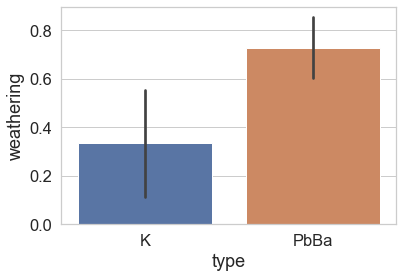

In [18]:
comparison('weathering', plt_data)

#### Numerical features

二氧化硅(SiO2) 🌟

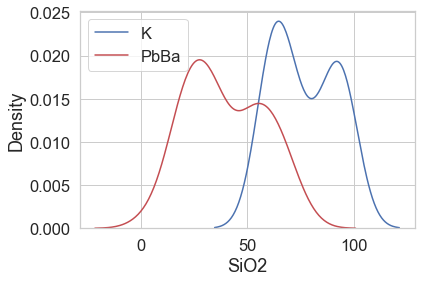

In [19]:
distribution('SiO2', plt_data)

氧化钠(Na2O)

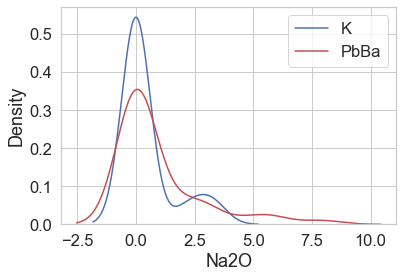

In [20]:
distribution('Na2O', plt_data)

氧化钾(K2O) 🌟

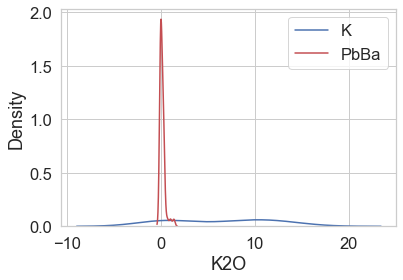

In [21]:
distribution('K2O', plt_data)

氧化钙(CaO) 🌟

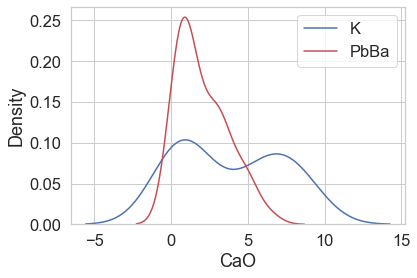

In [22]:
distribution('CaO', plt_data)

氧化镁(MgO)

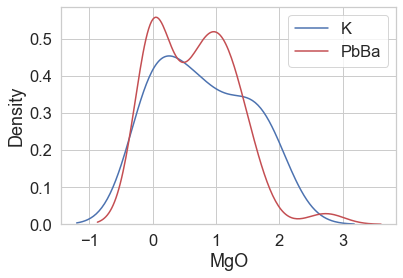

In [23]:
distribution('MgO', plt_data)

氧化铝(Al2O3) 🌟

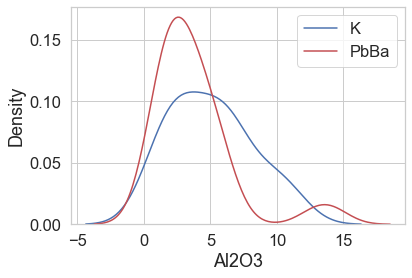

In [24]:
distribution('Al2O3', plt_data)

氧化铁(Fe2O3) 🌟

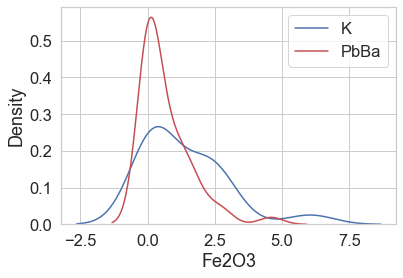

In [25]:
distribution('Fe2O3', plt_data)

氧化铜(CuO)

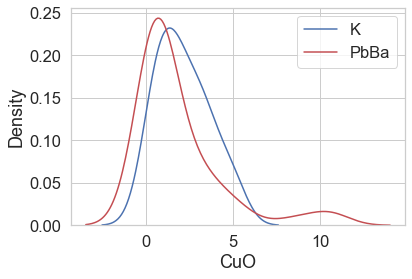

In [26]:
distribution('CuO', plt_data)

氧化铅(PbO) 🌟

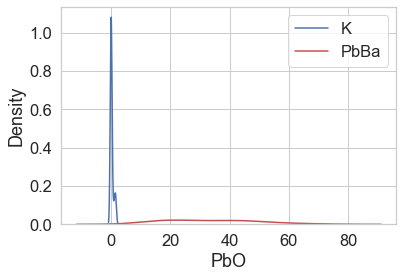

In [27]:
distribution('PbO', plt_data)

氧化钡(BaO) 🌟

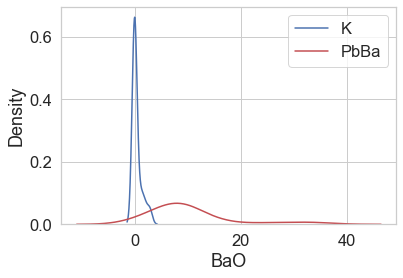

In [28]:
distribution('BaO', plt_data)

五氧化二磷(P2O5) 🌟

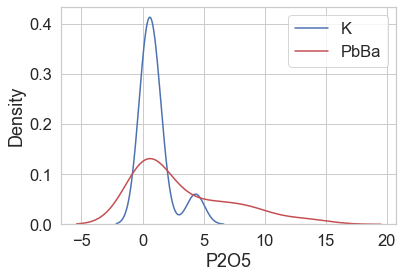

In [29]:
distribution('P2O5', plt_data)

氧化锶(SrO) 🌟

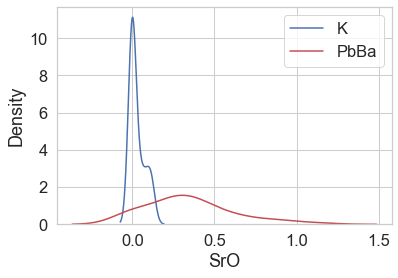

In [30]:
distribution('SrO', plt_data)

氧化锡(SnO2) 🌟

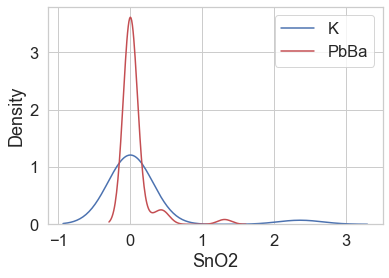

In [31]:
distribution('SnO2', plt_data)

二氧化硫(SO2) 🌟

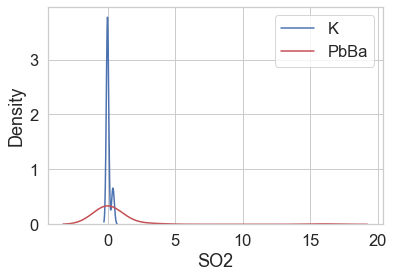

In [32]:
distribution('SO2', plt_data)

#### Correlation

Text(0.5, 1.0, 'Correlation heatmap of elements in K')

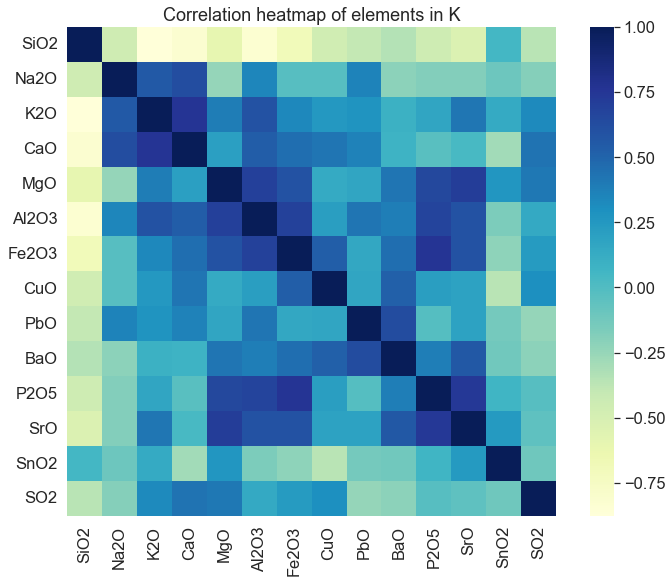

In [33]:
cor_data_K = df4[df4['type'] == 'K']
corrmat = cor_data_K.corr()
f, ax = plt.subplots(figsize = (12, 9))
sns.heatmap(corrmat, square = True, cmap = 'YlGnBu')
plt.title('Correlation heatmap of elements in K')

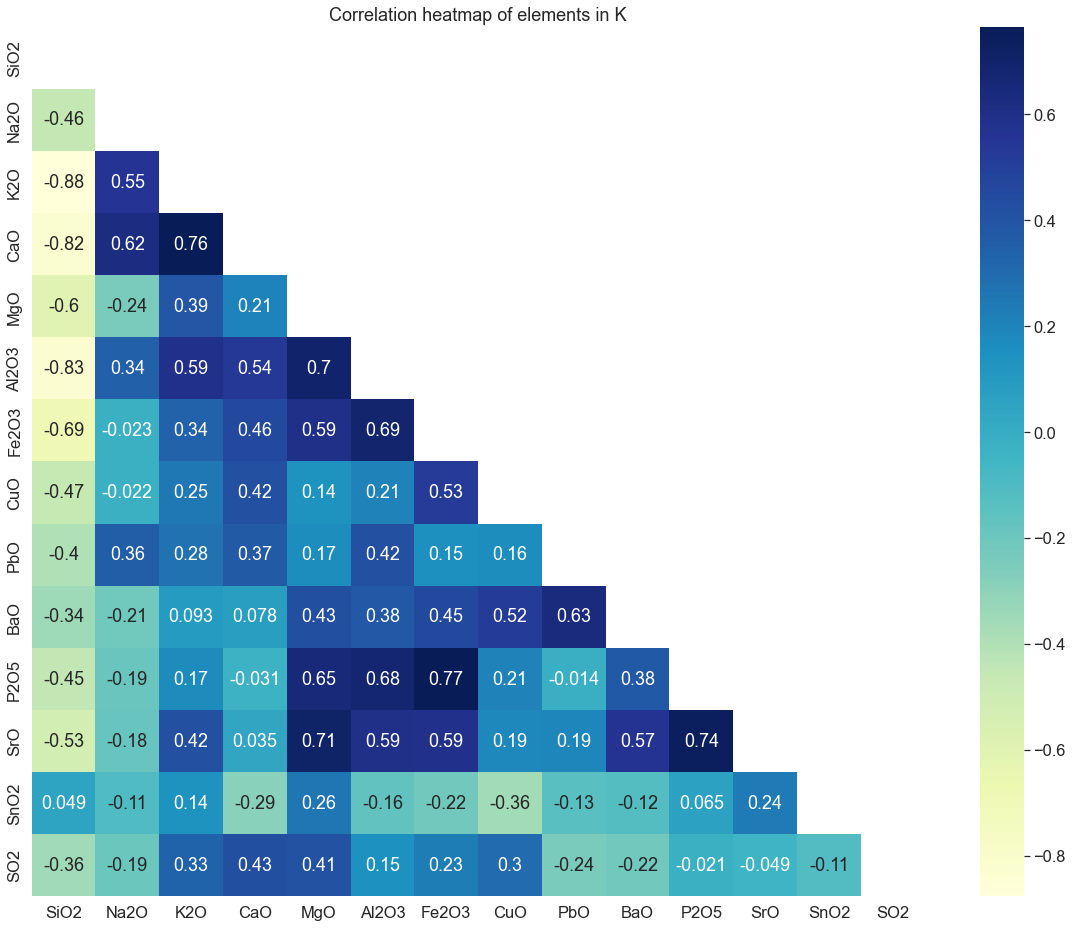

In [55]:
corr = df4[df4['type'] == 'K'].corr()
plt.figure(figsize = (20,16))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,annot=True, mask=mask, cmap="YlGnBu")
plt.title('Correlation heatmap of elements in K')
plt.show()

<Figure size 800x640 with 0 Axes>

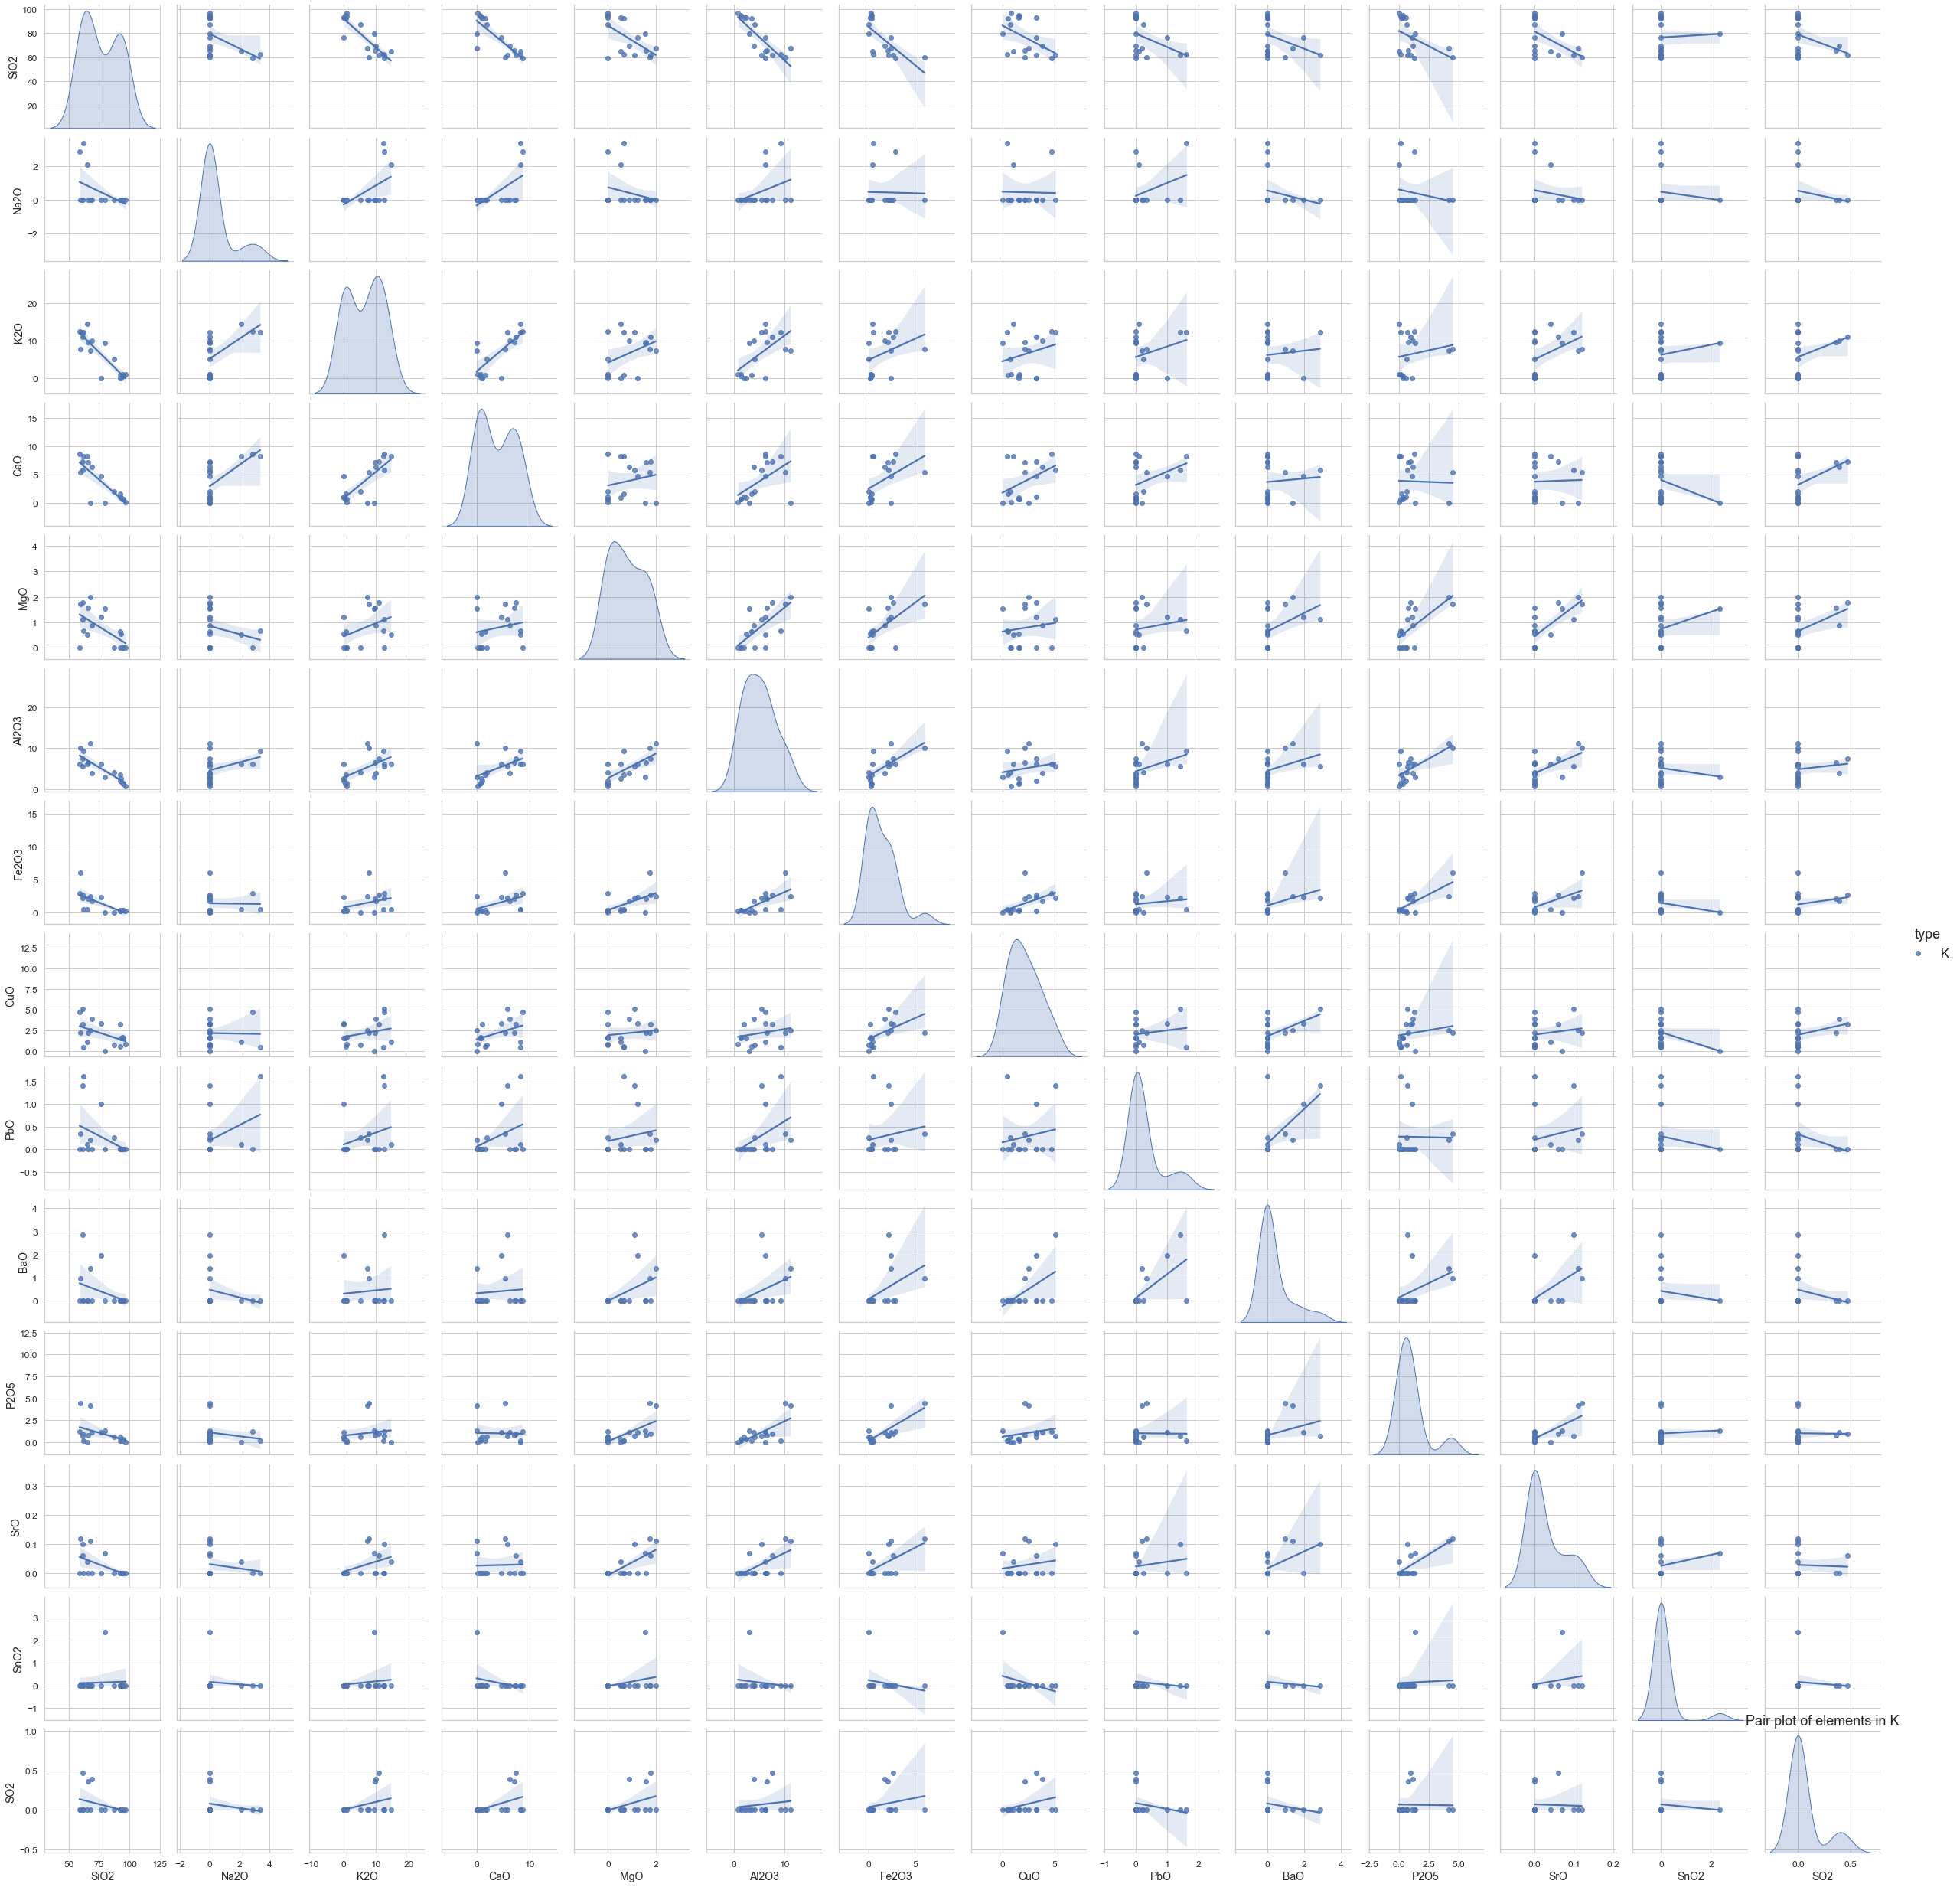

In [88]:
plt.figure(figsize=(10, 8), dpi=80)
sns.pairplot(df4[df4['type'] == 'K'][list(df4.columns)[1:16]], kind="reg", hue="type")
plt.title('Pair plot of elements in K')
plt.show()

Text(0.5, 1.0, 'Correlation heatmap of elements in PbBa')

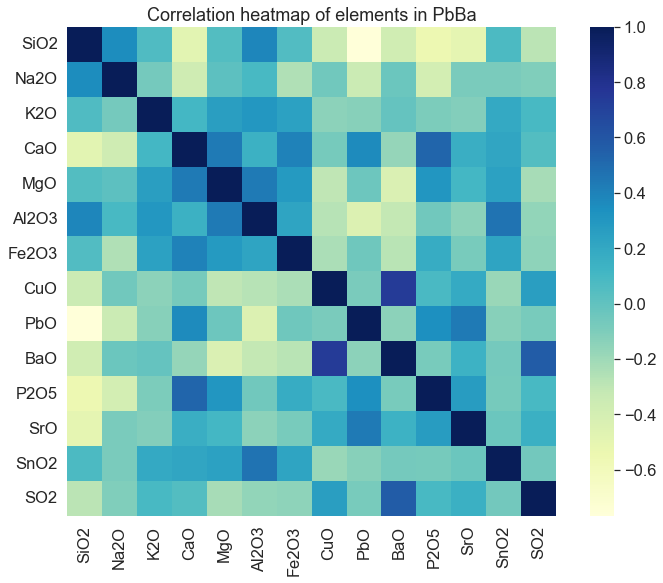

In [34]:
cor_data_PbBa = df4[df4['type'] == 'PbBa']
corrmat = cor_data_PbBa.corr()
f, ax = plt.subplots(figsize = (12, 9))
sns.heatmap(corrmat, square = True, cmap = 'YlGnBu')
plt.title('Correlation heatmap of elements in PbBa')

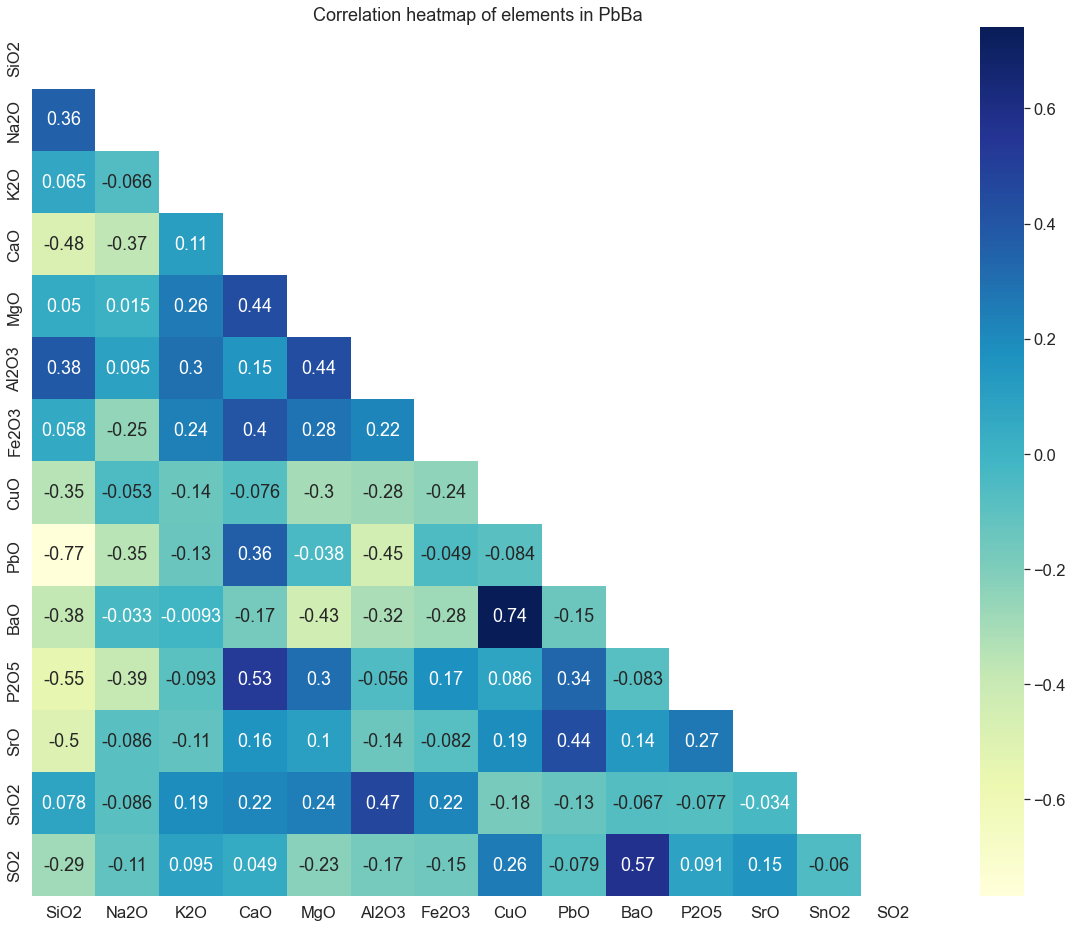

In [54]:
corr = df4[df4['type'] == 'PbBa'].corr()
plt.figure(figsize = (20,16))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,annot=True, mask=mask, cmap="YlGnBu")
plt.title('Correlation heatmap of elements in PbBa')
plt.show()

<Figure size 800x640 with 0 Axes>

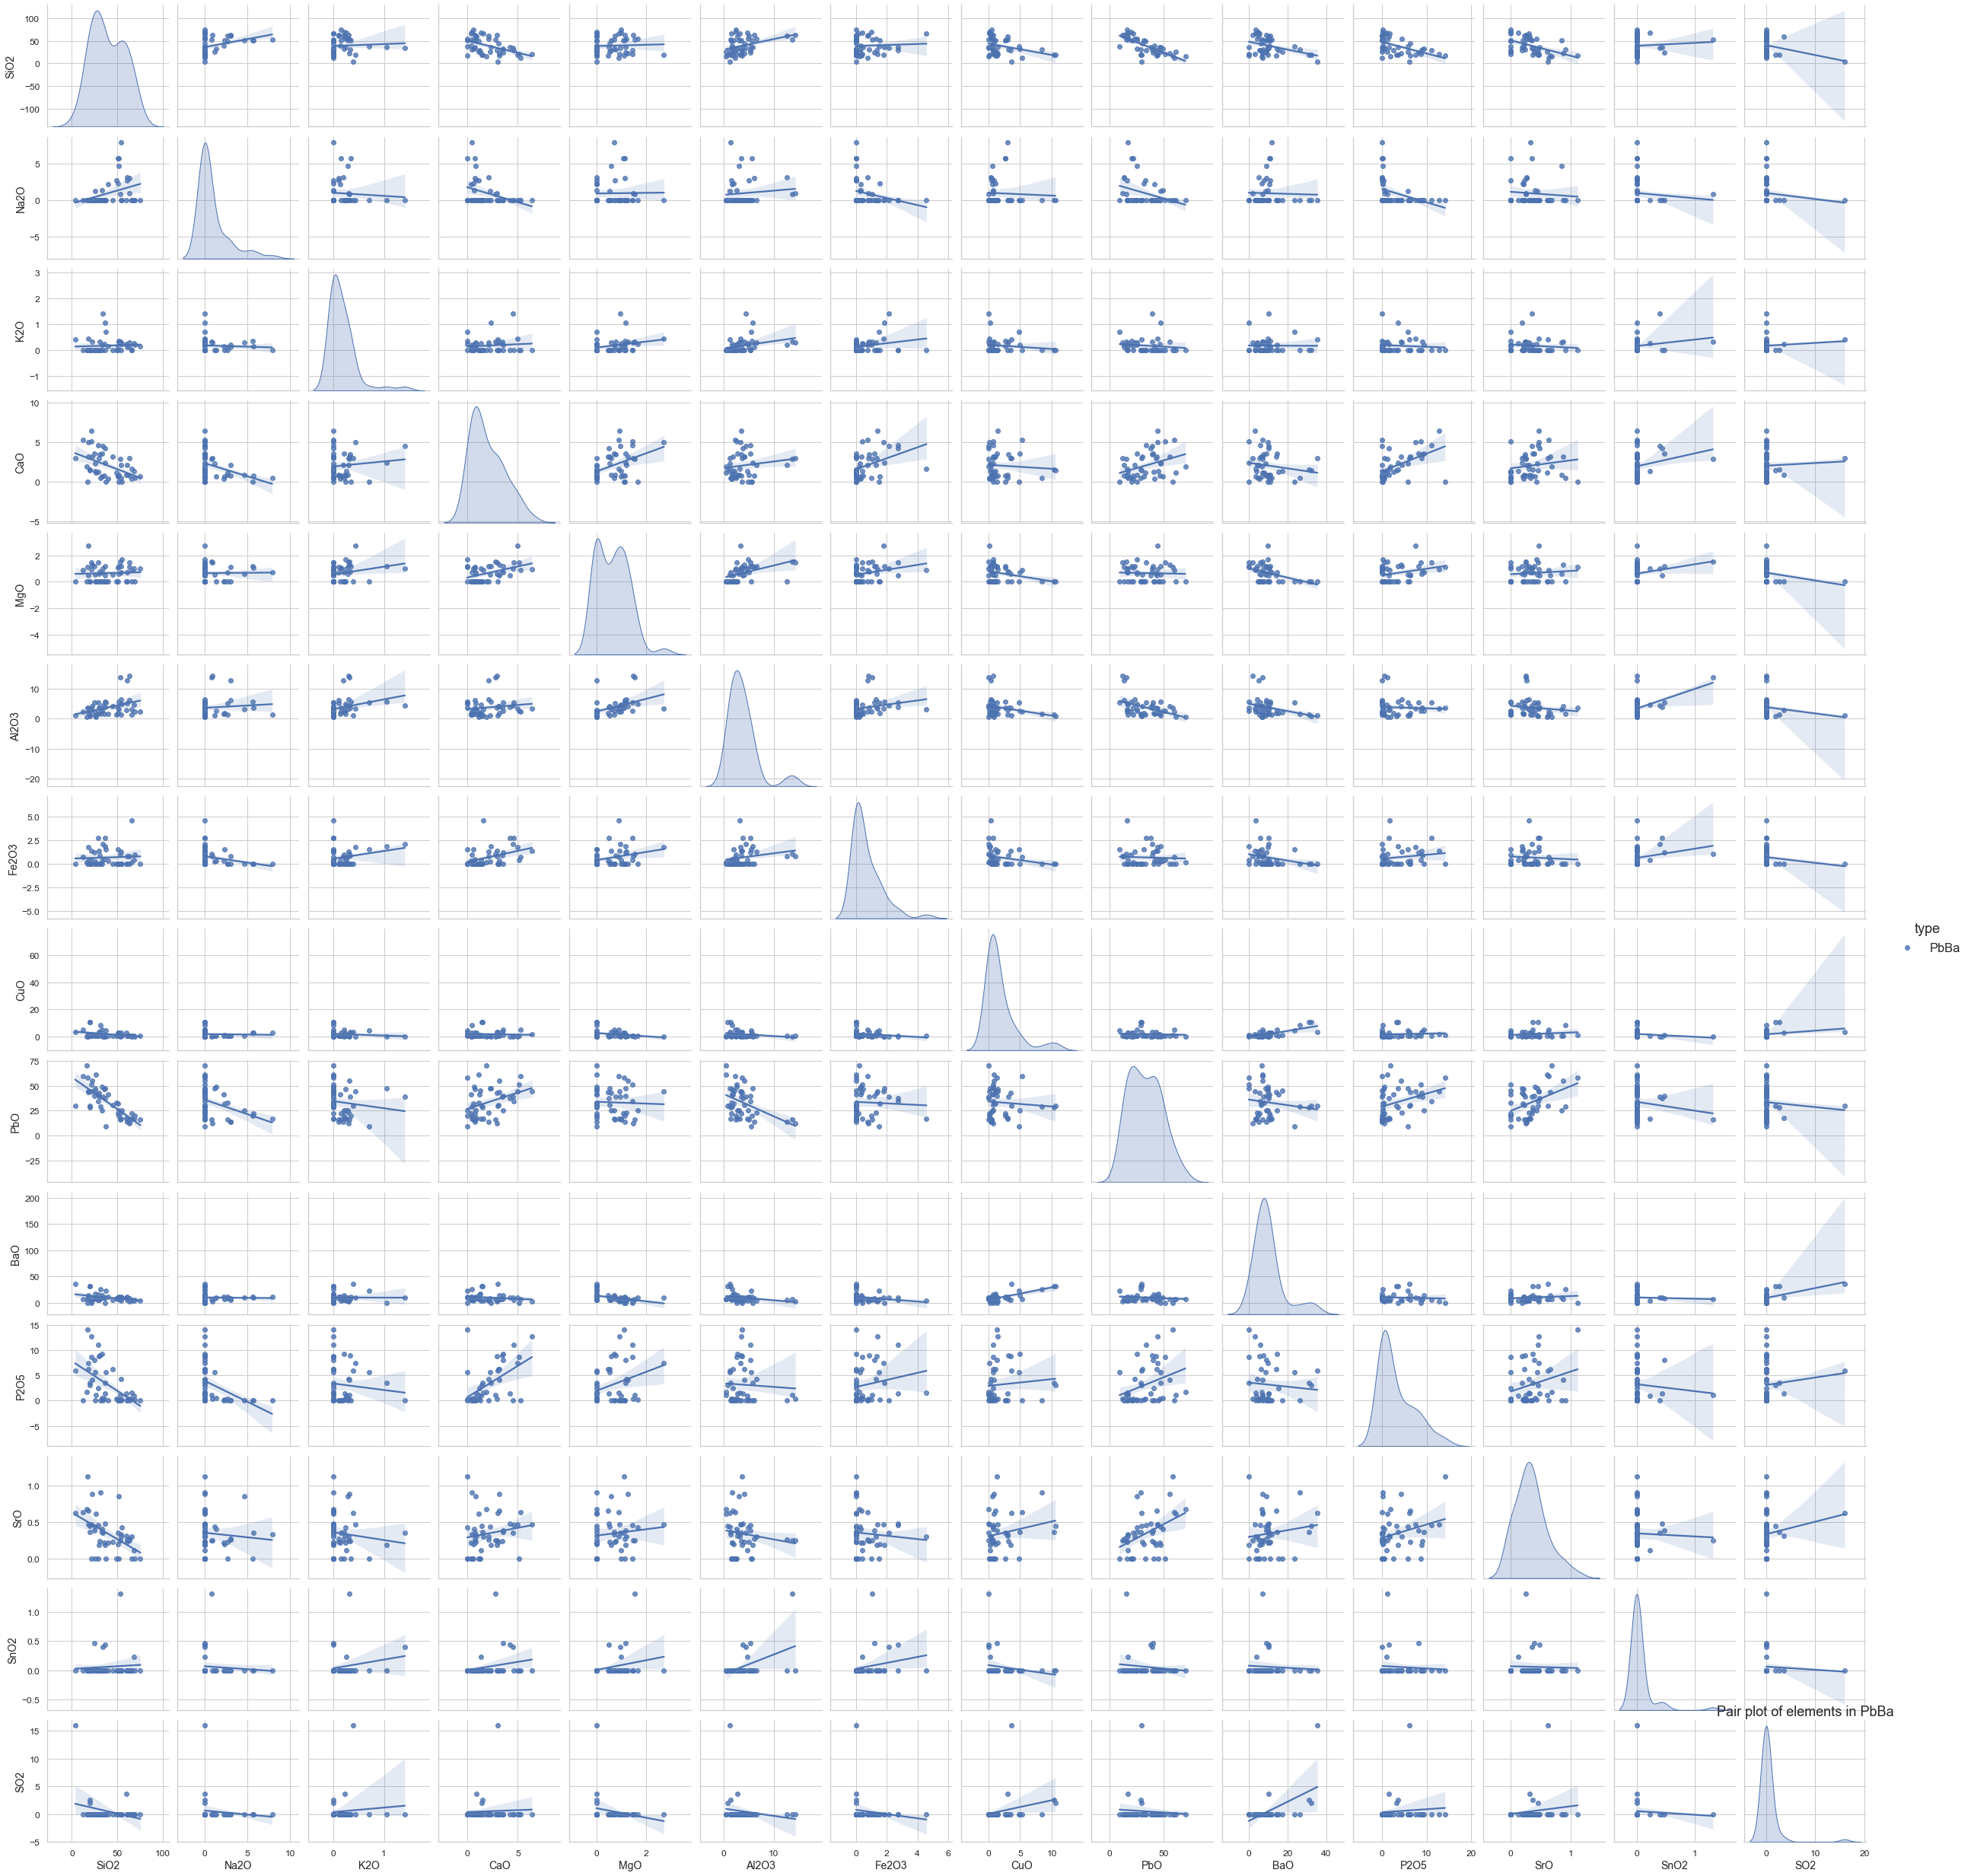

In [89]:
plt.figure(figsize=(10, 8), dpi=80)
sns.pairplot(df4[df4['type'] == 'PbBa'][list(df4.columns)[1:16]], kind="reg", hue="type")
plt.title('Pair plot of elements in PbBa')
plt.show()

### Feature Engineering

In [35]:
def fill_missing_value(data):
    filled_data = data.copy()
    cols = list(filled_data.columns)
    for col in cols:
        filled_data[col] = filled_data[col].fillna(0)
    return filled_data

def filter_invalid_data(data):
    filtered_data = data.copy()
    cols = list(filtered_data.columns)
    filtered_data['Total'] = filtered_data[cols[1:15]].sum(axis=1)
    filtered_data = filtered_data[(filtered_data['Total'] >= 85) & (filtered_data['Total'] <= 105)]
    return filtered_data
    
def rename_data(data):
    renamed_data = data.copy()
    renamed_data['表面风化'][renamed_data['表面风化'] == '无风化'] = 0
    renamed_data['表面风化'][renamed_data['表面风化'] == '风化'] = 1
    renamed_data = renamed_data.rename(columns={'表面风化':'weathering', 
                              '二氧化硅(SiO2)':'SiO2', 
                              '氧化钠(Na2O)':'Na2O',
                              '氧化钾(K2O)':'K2O',
                              '氧化钙(CaO)':'CaO',
                              '氧化镁(MgO)':'MgO',
                              '氧化铝(Al2O3)':'Al2O3',
                              '氧化铁(Fe2O3)':'Fe2O3',
                              '氧化铜(CuO)':'CuO',
                              '氧化铅(PbO)':'PbO',
                              '氧化钡(BaO)':'BaO',
                              '五氧化二磷(P2O5)':'P2O5',
                              '氧化锶(SrO)':'SrO',
                              '氧化锡(SnO2)':'SnO2',
                              '二氧化硫(SO2)':'SO2'})
    return renamed_data

def process_data_gm(data, pipeline_functions):
    """Process the data for a guided model."""
    for function, arguments, keyword_arguments in pipeline_functions:
        if keyword_arguments and (not arguments):
            data = data.pipe(function, **keyword_arguments)
        elif (not keyword_arguments) and (arguments):
            data = data.pipe(function, *arguments)
        else:
            data = data.pipe(function)
    return data

def select_columns(data, *columns):
    """Select only columns passed as arguments."""
    return data.loc[:, columns]

In [36]:
def process_data_fm(data):
    X = data
    X = process_data_gm(X, [
                            (fill_missing_value, None, None),
                            (filter_invalid_data, None, None),
                            (rename_data, None, None),
                            (select_columns, [# Binary Features
                                              'weathering',
                                              # Numerical Features
                                              'SiO2',
                                              'Na2O',
                                              'K2O',
                                              'CaO',
                                              'MgO',
                                              'Al2O3',
                                              'Fe2O3',
                                              'CuO',
                                              'PbO',
                                              'BaO',
                                              'P2O5',
                                              'SrO',
                                              'SnO2',
                                              'SO2'], None)])
    return X

### Grid Search CV to Find Best Hyperparameters

In [37]:
tr = train.copy()
tr['类型'][tr['类型'] == '高钾'] = 'K'
tr['类型'][tr['类型'] == '铅钡'] = 'PbBa'
tr = tr.rename(columns={'类型':'type'})
tr.head()

,表面风化,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),type
12,风化,92.63,NaN,NaN,1.07,NaN,1.98,0.17,3.24,NaN,NaN,0.61,NaN,NaN,NaN,K
65,风化,30.39,NaN,0.34,3.49,0.79,3.52,0.86,3.13,39.35,7.66,8.99,0.24,NaN,NaN,PbBa
30,无风化,49.01,2.71,NaN,1.13,NaN,1.45,NaN,0.86,32.92,7.95,0.35,NaN,NaN,NaN,PbBa
33,风化,33.59,NaN,0.21,3.51,0.71,2.69,NaN,4.93,25.39,14.61,9.38,0.37,NaN,NaN,PbBa
9,无风化,65.18,2.10,14.52,8.27,0.52,6.18,0.42,1.07,0.11,0.00,NaN,0.04,NaN,NaN,K


In [38]:
from sklearn.model_selection import GridSearchCV
def model_finder_function(phi_function, model, params):
    y_train = tr.copy()['type']
    X_train = phi_function(tr.copy())
    model_finder = GridSearchCV(estimator = model,
                                param_grid = params,
                                scoring = "accuracy",
                                cv = 5,
                                n_jobs = -1)
    model_finder.fit(X_train, y_train)
    print("Best Model: ", model_finder.best_estimator_)
    print("Mean Accuracy of Best Model: ", model_finder.best_score_)

In [39]:
from sklearn.ensemble import RandomForestClassifier
max_depth = [5, 10, 15, 20, 25, 30]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 5, 10]

params_group = {'max_depth':max_depth,
                'min_samples_split':min_samples_split,
                'min_samples_leaf':min_samples_leaf}

random_forest_finded_model = model_finder_function(process_data_fm, RandomForestClassifier(random_state = 0), params_group)

Best Model:  RandomForestClassifier(max_depth=5, random_state=0)
Mean Accuracy of Best Model:  1.0


### Train and validate

#### Helper functions

In [40]:
def evaluation_metrics(df):
    df_cp = df.copy()
    TP = len(df_cp[(df_cp['type'] == 'PbBa') & (df_cp['type_predict'] == 'PbBa')])
    FP = len(df_cp[(df_cp['type'] == 'K') & (df_cp['type_predict'] == 'PbBa')])
    FN = len(df_cp[(df_cp['type'] == 'PbBa') & (df_cp['type_predict'] == 'K')])
    TN = len(df_cp[(df_cp['type'] == 'K') & (df_cp['type_predict'] == 'K')])
    acc = (TP + TN) / (TP + FP + FN + TN)
    print("Accuracy: ", acc)
    precision = TP / (TP + FP)
    print("Precision: ", precision)
    recall = TP / (TP + FN)
    print("Recall: ", recall)
    False_alarm_rate = FP / (FP + TN)
    print("False Alarm Rate: ", False_alarm_rate)

In [41]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(df):
    df_cp = df.copy()
    cm = confusion_matrix(df['type'], df['type_predict'])
    sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues', annot_kws = {'size': 16})

#### Final model

-------------- Training Evaluation Metrics --------------

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
False Alarm Rate:  0.0

-------------- Training Confusion Matrix --------------


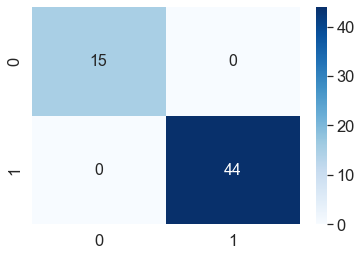

In [42]:
model_fi = RandomForestClassifier(max_depth=5, random_state=0)
train_fi = train.copy()
train_fi['类型'][train_fi['类型'] == '高钾'] = 'K'
train_fi['类型'][train_fi['类型'] == '铅钡'] = 'PbBa'
train_fi = train_fi.rename(columns={'类型':'type'})
y_train_fi = train_fi.copy()['type']
X_train_fi = process_data_fm(train_fi.copy())
model_fi.fit(X_train_fi, y_train_fi)
train_fi['type_predict'] = model_fi.predict(X_train_fi)
print("-------------- Training Evaluation Metrics --------------")
print('')
evaluation_metrics(train_fi)
print('')
print("-------------- Training Confusion Matrix --------------")
plot_confusion_matrix(train_fi)

-------------- Validation Evaluation Metrics --------------

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
False Alarm Rate:  0.0

-------------- Validation Confusion Matrix --------------


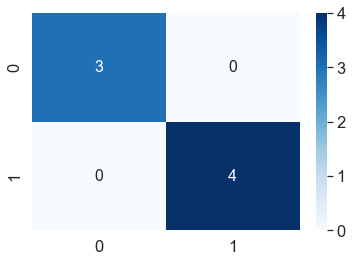

In [43]:
val_fi = val.copy()
val_fi['类型'][val_fi['类型'] == '高钾'] = 'K'
val_fi['类型'][val_fi['类型'] == '铅钡'] = 'PbBa'
val_fi = val_fi.rename(columns={'类型':'type'})
y_val_fi = val_fi.copy()['type']
X_val_fi = process_data_fm(val_fi.copy())
val_fi['type_predict'] = model_fi.predict(X_val_fi)
print("-------------- Validation Evaluation Metrics --------------")
print('')
evaluation_metrics(val_fi)
print('')
print("-------------- Validation Confusion Matrix --------------")
plot_confusion_matrix(val_fi)

In [44]:
test_predictions = model_fi.predict(process_data_fm(df3.copy()))
df3_with_prediction = df3.copy()
df3_with_prediction['预测类型'] = test_predictions

In [45]:
df3_with_prediction

,文物编号,表面风化,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),预测类型
0,A1,无风化,78.45,NaN,NaN,6.08,1.86,7.23,2.15,2.11,NaN,NaN,1.06,0.03,NaN,0.51,K
1,A2,风化,37.75,NaN,NaN,7.63,NaN,2.33,NaN,NaN,34.30,NaN,14.27,NaN,NaN,NaN,PbBa
2,A3,无风化,31.95,NaN,1.36,7.19,0.81,2.93,7.06,0.21,39.58,4.69,2.68,0.52,NaN,NaN,PbBa
3,A4,无风化,35.47,NaN,0.79,2.89,1.05,7.07,6.45,0.96,24.28,8.31,8.45,0.28,NaN,NaN,PbBa
4,A5,风化,64.29,1.2,0.37,1.64,2.34,12.75,0.81,0.94,12.23,2.16,0.19,0.21,0.49,NaN,PbBa
5,A6,风化,93.17,NaN,1.35,0.64,0.21,1.52,0.27,1.73,NaN,NaN,0.21,NaN,NaN,NaN,K
6,A7,风化,90.83,NaN,0.98,1.12,NaN,5.06,0.24,1.17,NaN,NaN,0.13,NaN,NaN,0.11,K
7,A8,无风化,51.12,0.0,0.23,0.89,0.00,2.12,0.00,9.01,21.24,11.34,1.46,0.31,0.00,2.26,PbBa


In [ ]:
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz

# 系统环境变量添加Graphviz安装路径，以便下面代码可以用dot命令
os.environ["PATH"] += os.pathsep + 'D:/Program Files (x86)/Graphviz2.38/bin'

model_fi = RandomForestClassifier(max_depth=5, random_state=0)
train_fi = train.copy()
train_fi['类型'][train_fi['类型'] == '高钾'] = 'K'
train_fi['类型'][train_fi['类型'] == '铅钡'] = 'PbBa'
train_fi = train_fi.rename(columns={'类型':'type'})
y_train_fi = train_fi.copy()['type']
X_train_fi = process_data_fm(train_fi.copy())
model_fi.fit(X_train_fi, y_train_fi)

# 循环打印每棵树
for idx, estimator in enumerate(model_fi.estimators_):
    # 导出dot文件
    export_graphviz(estimator,
                    out_file='tree{}.dot'.format(idx),
                    feature_names=list(X_train_fi.columns),
                    class_names=['K','PbBa'],
                    rounded=True,
                    proportion=False,
                    precision=2,
                    filled=True)
    # 转换为png文件
    os.system('dot -Tpng tree{}.dot -o tree{}.png'.format(idx, idx))

### Dimension deduction

In [56]:
df4_pca = pd.read_excel('附件.xlsx',sheet_name='表单4')
df4_pca = df4_pca.drop(['文物编号','纹饰','颜色','文物采样点'],axis=1)
df4_pca

,表面风化,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),类型
0,无风化,69.33,NaN,9.99,6.32,0.87,3.93,1.74,3.87,NaN,NaN,1.17,NaN,NaN,0.39,高钾
1,无风化,87.05,NaN,5.19,2.01,NaN,4.06,NaN,0.78,0.25,NaN,0.66,NaN,NaN,NaN,高钾
2,无风化,61.71,NaN,12.37,5.87,1.11,5.50,2.16,5.09,1.41,2.86,0.70,0.10,NaN,NaN,高钾
3,无风化,65.88,NaN,9.67,7.12,1.56,6.44,2.06,2.18,NaN,NaN,0.79,NaN,NaN,0.36,高钾
4,无风化,61.58,NaN,10.95,7.35,1.77,7.50,2.62,3.27,NaN,NaN,0.94,0.06,NaN,0.47,高钾
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,风化,22.28,NaN,0.32,3.19,1.28,4.15,NaN,0.83,55.46,7.04,4.24,0.88,NaN,NaN,铅钡
62,风化,17.11,NaN,NaN,NaN,1.11,3.65,NaN,1.34,58.46,NaN,14.13,1.12,NaN,NaN,铅钡
63,风化,29.15,NaN,NaN,1.21,NaN,1.85,NaN,0.79,41.25,15.45,2.54,NaN,NaN,NaN,铅钡
64,风化,25.42,NaN,NaN,1.31,NaN,2.18,NaN,1.16,45.10,17.30,NaN,NaN,NaN,NaN,铅钡


In [58]:
df4_pca_K = df4_pca[df4_pca['类型'] == '高钾']
df4_pca_PbBa = df4_pca[df4_pca['类型'] == '铅钡']

#### K

In [65]:
a_K = process_data_fm(df4_pca_K.copy())
a_K = a_K[list(a_K.columns)[1:15]]
a_K.to_csv('a_K.csv')

In [108]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import FactorAnalysis, PCA
from sklearn.preprocessing import StandardScaler

In [114]:
X_K = StandardScaler().fit_transform(a_K.copy())
X_K_std = pd.DataFrame(X_K, columns=list(a_K.columns))
X_K_std

,SiO2,Na2O,K2O,CaO,MgO,Al2O3,Fe2O3,CuO,PbO,BaO,P2O5,SrO,SnO2,SO2
0,-0.520223,-0.437920,0.695655,0.769848,0.122877,-0.376814,0.239100,1.182219,-0.549265,-0.487689,0.113832,-0.651608,-0.242536,2.109663
1,0.740167,-0.437920,-0.234901,-0.570776,-1.134808,-0.333336,-0.904200,-0.948533,-0.048922,-0.487689,-0.295964,-0.651608,-0.242536,-0.443757
2,-1.062220,-0.437920,1.157055,0.629876,0.469825,0.148273,0.515069,2.023486,2.272666,3.009000,-0.263823,1.694180,-0.242536,-0.443757
3,-0.765616,-0.437920,0.633618,1.018688,1.120352,0.462657,0.449362,0.016856,-0.549265,-0.487689,-0.191506,-0.651608,-0.242536,1.913246
4,-1.071467,-0.437920,0.881766,1.090229,1.423931,0.817174,0.817320,0.768480,-0.549265,-0.487689,-0.070978,0.755865,-0.242536,2.633441
5,-0.639719,-0.437920,0.187727,-1.195986,1.727510,2.037919,0.666195,0.244412,-0.148991,1.199525,2.532431,1.928758,-0.242536,-0.443757
6,-1.197363,-0.437920,0.247825,0.486793,1.366106,1.670024,3.064495,0.016856,0.151215,0.698251,2.789557,2.163337,-0.242536,-0.443757
7,-1.254266,2.265210,1.188074,1.510146,-1.134808,0.369011,0.988158,1.775243,-0.549265,-0.487689,0.194184,-0.651608,-0.242536,-0.443757
8,-1.008163,2.756688,1.139608,1.363953,-0.180702,1.395774,-0.575665,-1.162298,2.692954,-0.487689,-0.697724,-0.651608,-0.242536,-0.443757
9,-0.815405,1.546896,1.573867,1.376395,-0.383088,0.375700,-0.628231,-0.748560,-0.329114,-0.487689,-0.826287,0.286707,-0.242536,-0.443757


In [116]:
feature_names = list(X_K_std.columns)
feature_names

['SiO2',
 'Na2O',
 'K2O',
 'CaO',
 'MgO',
 'Al2O3',
 'Fe2O3',
 'CuO',
 'PbO',
 'BaO',
 'P2O5',
 'SrO',
 'SnO2',
 'SO2']



 PCA :

[[-0.39752313 -0.17611856]
 [ 0.09758954  0.49218878]
 [ 0.30158088  0.27551746]
 [ 0.27558527  0.43457836]
 [ 0.31051253 -0.27099819]
 [ 0.37446783  0.00911319]
 [ 0.34562259 -0.13372304]
 [ 0.2137939   0.05212132]
 [ 0.18271854  0.1388804 ]
 [ 0.23093599 -0.22831786]
 [ 0.27272979 -0.36423722]
 [ 0.29461486 -0.33658521]
 [-0.03785446 -0.19505993]
 [ 0.12006862  0.11144119]]


 Unrotated FA :

[[ 0.99873544 -0.00418925]
 [-0.45822333 -0.5493055 ]
 [-0.87459122 -0.17717575]
 [-0.82566893 -0.50636272]
 [-0.6001401   0.56977356]
 [-0.83004853  0.30028567]
 [-0.68791277  0.38245825]
 [-0.46378935 -0.02206555]
 [-0.39844382 -0.0829515 ]
 [-0.34279859  0.42171658]
 [-0.44472368  0.7754678 ]
 [-0.5217863   0.71710032]
 [ 0.05446634  0.26978655]
 [-0.35789719 -0.18075987]]


 Varimax FA :

[[ 0.85862073 -0.51015731]
 [-0.67351433 -0.24100539]
 [-0.84361505  0.29088605]
 [-0.96841185 -0.0176317 ]
 [-0.22823948  0.79543497]
 [-0.56306377  0.67978764]
 [-0.39888919  0.67851729]
 [-0.41

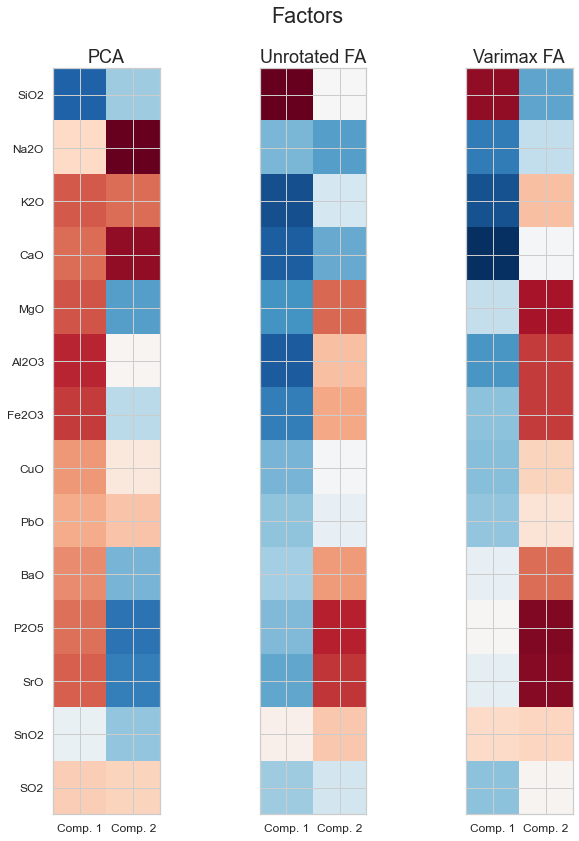

In [138]:
n_comps = 2

methods = [
    ("PCA", PCA()),
    ("Unrotated FA", FactorAnalysis()),
    ("Varimax FA", FactorAnalysis(rotation="varimax")),
]
fig, axes = plt.subplots(ncols=len(methods), figsize=(10, 12))

for ax, (method, fa) in zip(axes, methods):
    fa.set_params(n_components=n_comps)
    fa.fit(X_K_std)

    components = fa.components_.T
    print("\n\n %s :\n" % method)
    print(components)

    vmax = np.abs(components).max()
    ax.imshow(components, cmap="RdBu_r", vmax=vmax, vmin=-vmax)
    ax.set_yticks(np.arange(len(feature_names)))
    if ax.is_first_col():
        ax.set_yticklabels(feature_names)
    else:
        ax.set_yticklabels([])
    ax.set_title(str(method))
    ax.set_xticks([0, 1])
    ax.set_xticklabels(["Comp. 1", "Comp. 2"])
fig.suptitle("Factors")
plt.tight_layout()
plt.show()

In [139]:
new_X_K_std = np.dot(X_K_std, components)
new_X_K_std

array([[-2.4611909 ,  0.01657869],
       [ 3.12318425, -3.44744186],
       [-4.56756091,  5.34643155],
       [-3.09036514,  1.09613199],
       [-4.76410971,  3.58633742],
       [-1.21027537,  8.30203615],
       [-4.03535531,  9.82161887],
       [-5.69723723,  0.01894634],
       [-5.8582558 , -0.84971965],
       [-3.7018858 , -1.01239003],
       [ 3.33928555,  1.2722355 ],
       [-0.37925867,  1.74406239],
       [ 4.43851317, -4.06904179],
       [ 5.18526147, -4.6419178 ],
       [ 5.67178894, -5.1845065 ],
       [ 4.9934187 , -4.70257905],
       [ 4.33704818, -3.54698357],
       [ 4.67699459, -3.74979863]])

#### PbBa

In [91]:
a_PbBa = process_data_fm(df4_pca_PbBa.copy())
a_PbBa = a_PbBa[list(a_PbBa.columns)[1:15]]
a_PbBa.to_csv('a_PbBa.csv')

In [153]:
X_PbBa = StandardScaler().fit_transform(a_PbBa.copy())
X_PbBa_std = pd.DataFrame(X_PbBa, columns=list(a_PbBa.columns))
X_PbBa_std

,SiO2,Na2O,K2O,CaO,MgO,Al2O3,Fe2O3,CuO,PbO,BaO,P2O5,SrO,SnO2,SO2
0,-0.124100,-0.510705,1.942542,-1.246056,-1.057762,0.579132,0.890638,1.187970,-1.610246,1.728725,0.659756,-1.312806,-0.278976,-0.213667
1,-0.425807,-0.510705,-0.645489,-0.957026,-1.057762,-0.713658,-0.709596,2.681727,-0.282866,2.072445,-0.793845,2.158342,-0.278976,-0.213667
2,-0.292210,-0.510705,4.494122,1.515099,0.515337,0.210720,1.537090,-0.752291,0.391529,0.028082,-0.830120,0.022251,1.600440,-0.213667
3,-0.148036,-0.510705,-0.645489,1.361360,-0.239108,0.046610,2.194139,-0.752291,0.292511,0.035777,-0.464777,0.518129,1.788381,-0.213667
4,1.465154,-0.510705,-0.645489,-0.262125,0.370869,-0.204580,4.154691,-0.573689,-1.125190,-0.853020,-0.410364,-0.168471,-0.278976,-0.213667
5,1.676683,-0.510705,0.119985,-0.963176,-1.057762,-0.455770,0.350162,-0.707640,-0.910427,-0.665770,-0.786072,-1.312806,-0.278976,-0.213667
6,1.999544,-0.510705,-0.098722,-0.852484,0.547441,-0.459119,-0.709596,-0.561512,-1.151283,-0.836347,-0.796436,-1.312806,-0.278976,-0.213667
7,1.465154,-0.510705,-0.645489,-1.012372,-1.057762,-0.763896,-0.529437,-0.687345,-0.757217,-0.563167,-0.721294,-1.312806,-0.278976,-0.213667
8,1.142850,-0.510705,0.192887,-0.698744,-1.057762,-0.335199,-0.709596,0.469505,-1.079026,0.034495,-0.451821,-0.130327,-0.278976,1.340659
9,1.207422,0.960567,-0.244526,-0.729492,0.130088,0.428418,-0.709596,-0.537157,-1.162656,0.114012,-0.830120,-0.435483,-0.278976,-0.213667


In [154]:
feature_names = list(X_PbBa_std.columns)
feature_names

['SiO2',
 'Na2O',
 'K2O',
 'CaO',
 'MgO',
 'Al2O3',
 'Fe2O3',
 'CuO',
 'PbO',
 'BaO',
 'P2O5',
 'SrO',
 'SnO2',
 'SO2']



 PCA :

[[-0.46979188 -0.20700475 -0.03742938]
 [-0.19859567 -0.26128225 -0.10869341]
 [-0.14391246  0.1260467   0.38739163]
 [ 0.11946902  0.4585387   0.14177792]
 [-0.18262738  0.37651442  0.07502009]
 [-0.35159591  0.1711683   0.29767784]
 [-0.13612467  0.31863083  0.14576712]
 [ 0.3081369  -0.22359356  0.29190096]
 [ 0.33354009  0.25527359 -0.35963245]
 [ 0.30929925 -0.29331731  0.43330732]
 [ 0.24082555  0.34958794  0.00591056]
 [ 0.28479382  0.13410525 -0.03704611]
 [-0.17579047  0.18531173  0.33868595]
 [ 0.23978994 -0.12007371  0.42744701]]


 Unrotated FA :

[[-0.97136411 -0.20318394 -0.11633562]
 [-0.37422     0.04814561 -0.04913099]
 [-0.09666627  0.05232363  0.16089   ]
 [ 0.44879609 -0.12731461  0.6076083 ]
 [-0.06535441 -0.28219409  0.60858707]
 [-0.44307777 -0.08834347  0.53392603]
 [-0.06826953 -0.17793032  0.38989381]
 [ 0.2195883   0.71428944 -0.09195016]
 [ 0.89588094 -0.41257932 -0.15760182]
 [ 0.2241858   0.93820071 -0.25257214]
 [ 0.48795807 -0.01920935  0.66861

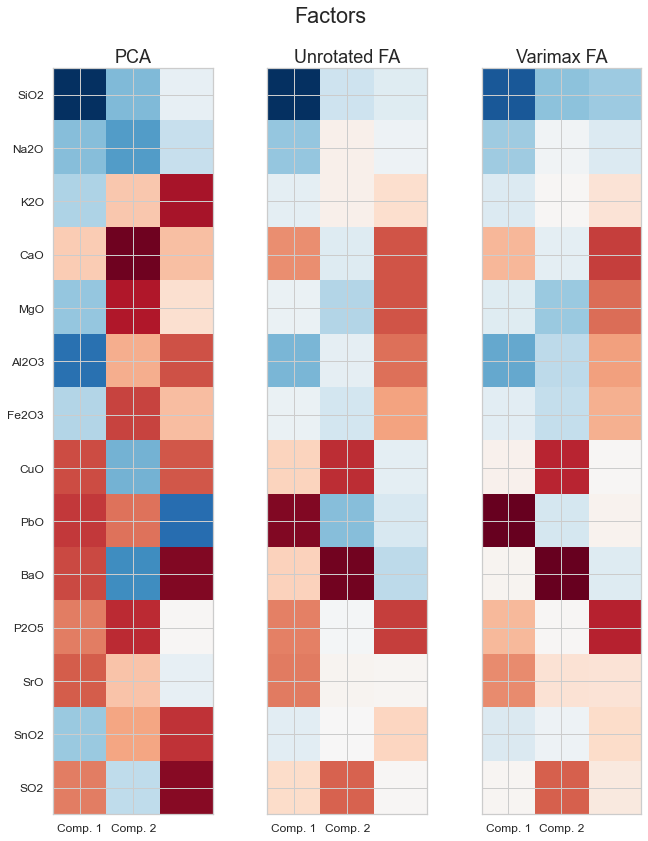

In [156]:
n_comps = 3

methods = [
    ("PCA", PCA()),
    ("Unrotated FA", FactorAnalysis()),
    ("Varimax FA", FactorAnalysis(rotation="varimax")),
]
fig, axes = plt.subplots(ncols=len(methods), figsize=(10, 12))

for ax, (method, fa) in zip(axes, methods):
    fa.set_params(n_components=n_comps)
    fa.fit(X_PbBa_std)

    components = fa.components_.T
    print("\n\n %s :\n" % method)
    print(components)

    vmax = np.abs(components).max()
    ax.imshow(components, cmap="RdBu_r", vmax=vmax, vmin=-vmax)
    ax.set_yticks(np.arange(len(feature_names)))
    if ax.is_first_col():
        ax.set_yticklabels(feature_names)
    else:
        ax.set_yticklabels([])
    ax.set_title(str(method))
    ax.set_xticks([0, 1])
    ax.set_xticklabels(["Comp. 1", "Comp. 2"])
fig.suptitle("Factors")
plt.tight_layout()
plt.show()

In [158]:
new_X_PbBa_std = np.dot(X_PbBa_std, components)
new_X_PbBa_std

array([[-2.49072518,  2.81405694, -0.51640692],
       [ 1.56322755,  5.31415063, -2.25567257],
       [-0.17157578, -1.39063337,  2.36699579],
       [ 0.70065191, -1.2230543 ,  1.62906588],
       [-2.74315745, -2.84479737,  0.50564254],
       [-3.00822494, -1.49024699, -2.63085255],
       [-3.53357374, -1.98423981, -2.17412798],
       [-2.31776287, -1.02795496, -3.08368824],
       [-1.84116643,  1.61387024, -2.08326377],
       [-3.3194358 , -0.71477626, -1.91651696],
       [-1.91490847, -1.03888136, -0.90565847],
       [-1.26488325, -0.23979029, -1.7517817 ],
       [-1.16136889, -0.32363027, -2.71510563],
       [ 0.0384929 , -2.79813498,  1.98131676],
       [ 1.73959608,  7.13398893, -1.20007566],
       [ 1.12863191,  1.81286807,  1.579721  ],
       [ 1.75464821, -0.31568588,  1.7873284 ],
       [-3.10610997,  0.60458154, -2.81210671],
       [-1.22963409, -0.71522651, -2.2002701 ],
       [ 2.0175023 ,  7.25491169, -1.3837779 ],
       [ 3.37000894,  9.36553891,  0.991

### Kmeans - K

In [125]:
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
np.random.seed(42)

#### 找到最佳簇数

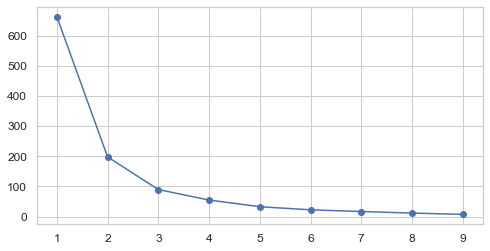

In [140]:
kmeans_per_k = [KMeans(n_clusters = k).fit(new_X_K_std) for k in range(1,10)]
inertias = [model.inertia_ for model in kmeans_per_k]
plt.figure(figsize=(8,4))
plt.plot(range(1,10),inertias,'bo-')
plt.show()

#### 结果

In [141]:
from sklearn.cluster import KMeans
k = 3
kmeans = KMeans(n_clusters = k,random_state=42)
y_pred_K =  kmeans.fit_predict(new_X_K_std)
y_pred_K

array([2, 1, 0, 2, 2, 0, 0, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1], dtype=int32)

#### 中心

In [142]:
kmeans.cluster_centers_

array([[-3.27106386,  7.82336219],
       [ 4.47068686, -3.50875421],
       [-3.70747189,  0.65713531]])

#### 评估

In [143]:
kmeans.inertia_

89.54804213828717

#### 可视化

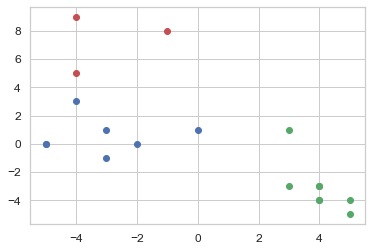

In [152]:
import csv
A = np.array(new_X_K_std)
y_pred_K = kmeans.fit_predict(new_X_K_std)
num, dim = new_X_K_std.shape
color = ['r', 'g', 'b', 'c', 'y', 'm', 'k']
f = open('result.csv', 'w', encoding='utf-8', newline='')
csv_writer = csv.writer(f)

for p in range(0,num):
    y=y_pred_K[p]
    csv_writer.writerow([y])
    plt.scatter(x=int(A[p, 0]), y=int(A[p, 1]), c=color[int(y)])
f.close()
plt.show()

### Kmeans - PbBa

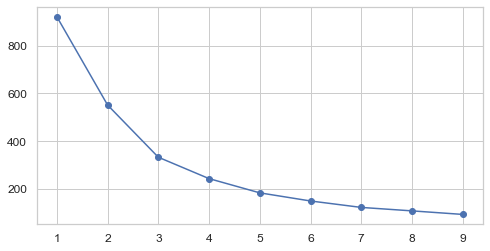

In [159]:
kmeans_per_k = [KMeans(n_clusters = k).fit(new_X_PbBa_std) for k in range(1,10)]
inertias = [model.inertia_ for model in kmeans_per_k]
plt.figure(figsize=(8,4))
plt.plot(range(1,10),inertias,'bo-')
plt.show()

In [160]:
from sklearn.cluster import KMeans
k = 3
kmeans = KMeans(n_clusters = k,random_state=42)
y_pred_K =  kmeans.fit_predict(new_X_PbBa_std)
y_pred_K

array([1, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1, 1, 2, 2, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0], dtype=int32)

In [161]:
kmeans.cluster_centers_

array([[ 2.13633267, -0.42306921,  1.27518538],
       [-2.7536184 , -0.92085706, -1.21337311],
       [ 2.17258372,  7.26714754, -0.9621071 ]])

In [162]:
kmeans.inertia_

332.9332321470997

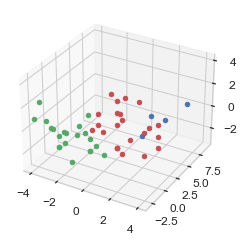

In [163]:
import csv
A = np.array(new_X_PbBa_std)
y_pred_PbBa = kmeans.fit_predict(new_X_PbBa_std)
num, dim = new_X_PbBa_std.shape
color = ['r', 'g', 'b', 'c', 'y', 'm', 'k']
ax = plt.subplot(111, projection='3d')
f = open('result.csv', 'w', encoding='utf-8', newline='')
csv_writer = csv.writer(f)

for p in range(0,num):
    y=y_pred_PbBa[p]
    csv_writer.writerow([y])
    ax.scatter(int(A[p, 0]), int(A[p, 1]), int(A[p, 2]), c=color[int(y)])
f.close()
plt.show()